In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#!pip install git+https://github.com/automl/fanova
sns.set_style("dark")

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [74]:
from lightjob.cli import load_db
db = load_db()
experiments = list(db.all_jobs())
experiments = map(lambda e:e['content'], experiments)

In [75]:
"""

from lightexperiments.light import Light
light = Light(config=dict(host='romeo1'))
light.launch()
experiments = light.db.find({"tags": ["deepconvnets", "zoonormalized"], 
                             #"model": {"$regex": "residual"},
                             "dataset": "Cifar10"})
experiments = list(experiments)
"""

'\n\nfrom lightexperiments.light import Light\nlight = Light(config=dict(host=\'romeo1\'))\nlight.launch()\nexperiments = light.db.find({"tags": ["deepconvnets", "zoonormalized"], \n                             #"model": {"$regex": "residual"},\n                             "dataset": "Cifar10"})\nexperiments = list(experiments)\n'

In [76]:
"""
from lightjob.cli import load_db
db = load_db()
for e in experiments:
    e_clean = e.copy()
    e_clean['start'] = str(e_clean['start'])
    e_clean['end'] = str(e_clean['end'])
    del e_clean['_id']
    db.add_job(e_clean)
"""

"\nfrom lightjob.cli import load_db\ndb = load_db()\nfor e in experiments:\n    e_clean = e.copy()\n    e_clean['start'] = str(e_clean['start'])\n    e_clean['end'] = str(e_clean['end'])\n    del e_clean['_id']\n    db.add_job(e_clean)\n"

In [77]:
print("{:.2f} hours of experiments".format(sum((e['duration']) for e in experiments) / 3600.))
print("{:.2f} days of experiments".format(sum((e['duration']) for e in experiments) / (24*3600.)))
print("Number of experiments : {}".format(len(experiments)))

22222.88 hours of experiments
925.95 days of experiments
Number of experiments : 620


In [78]:
import pprint
import pandas as pd

for e in experiments:
    e["accuracy_train_last"] = e["accuracy_train"][-1]
    e["accuracy_valid_last"] = e["accuracy_valid"][-1]
    e['accuracy_train_first'] = e['accuracy_train'][0]
    e['accuracy_valid_max'] = np.max(e['accuracy_valid'])
#experiments  = filter(lambda e:e["accuracy_train_last"]>=0.9, experiments)                                

In [79]:
cols = [
 u'seed',
 u'accuracy_train_std',
 u'accuracy_valid_std',
 u'accuracy_test_std',
 u'accuracy_train',
 u'accuracy_valid',
 u'moving_var_accuracy_train',
 u'accuracy_train_last',
 u'accuracy_valid_last',
 u'accuracy_valid_max',
 u'loss_std',
 u'end',
 u'accuracy_test',
 #u'tags',
 u'hp',
 u'hp_model',
 u'loss_train',
 u'learning_rate'
 u'dataset',
 u'start',
 u'epoch',
 u'seed',
 u'error_valid',
 u'code_',
 u'_id',
 u'model',
 u'duration',
]
df = pd.DataFrame(experiments, columns=cols)
df

,seed,accuracy_train_std,accuracy_valid_std,accuracy_test_std,accuracy_train,accuracy_valid,moving_var_accuracy_train,accuracy_train_last,accuracy_valid_last,accuracy_valid_max,...,loss_train,learning_ratedataset,start,epoch,seed,error_valid,code_,_id,model,duration
0,161316109,"[0.022755571899, 0.0237743070268, 0.0245599257...","[0.016671306721, 0.0112580012066, 0.0126455092...",0.007611,"[0.533012967481, 0.653083832249, 0.72138444767...","[0.518250247082, 0.637446759695, 0.69733474915...","[0.0255692541153, 0.055388846794, 0.0831312030...",0.993374,0.805310,0.807883,...,"[1.68904733658, 1.21710717678, 1.0449461937, 0...",NaN,2016-02-03 14:04:49.973000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",161316109,"[0.481749752918, 0.362553240305, 0.30266525084...",from datetime import datetime\nimport matplotl...,NaN,residualv4,95481.900408
1,1234,"[0.0868453573671, 0.0874958625025, 0.092347645...","[0.0911921716606, 0.0926392794719, 0.095923665...",0.079030,"[0.369140625, 0.435688064759, 0.49117564006, 0...","[0.364316239316, 0.422542735043, 0.46968482906...","[0.0122638320923, 0.025349312322, 0.0382686632...",0.977998,0.683360,0.686699,...,"[3.13381743431, 1.64789187908, 1.49467408657, ...",NaN,2016-01-17 13:59:09.655000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.635683760684, 0.577457264957, 0.53031517094...",from datetime import datetime\nimport matplotl...,NaN,residualv2,27385.909030
2,1234,"[0.114412423308, 0.122898717465, 0.12543683105...","[0.108558193847, 0.122577531498, 0.12585032479...",0.092791,"[0.2890625, 0.398955195783, 0.466443900602, 0....","[0.292467948718, 0.403579059829, 0.46527777777...","[0.00752014160156, 0.0190923874462, 0.03162153...",0.999976,0.853900,0.855903,...,"[2.19503235817, 1.75370192528, 1.57253086567, ...",NaN,2016-01-18 01:24:10.511000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.707532051282, 0.596420940171, 0.53472222222...",from datetime import datetime\nimport matplotl...,NaN,vgg,44373.547169
3,205107939,"[0.0150552995319, 0.0190503785436, 0.017914435...","[0.0156031014351, 0.0148867667058, 0.016802116...",0.009406,"[0.462405588144, 0.639701429264, 0.70795950708...","[0.446734692677, 0.623367493411, 0.68848538686...","[0.0192437035152, 0.0490169555916, 0.076772035...",0.957734,0.864396,0.865251,...,"[1.49978899956, 1.127835989, 0.943700671196, 0...",NaN,2016-01-24 04:27:07.495000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",205107939,"[0.553265307323, 0.376632506589, 0.31151461314...",from datetime import datetime\nimport matplotl...,NaN,residualv3,64242.696836
4,813422842,"[0.015210415774, 0.0171969562997, 0.0167119473...","[0.0181925287259, 0.0146722887437, 0.015244150...",0.004342,"[0.537819716974, 0.659022694894, 0.71948900078...","[0.542218679405, 0.649684676205, 0.70073212773...","[0.0260325043169, 0.0563977238566, 0.083720128...",0.970103,0.866898,0.869594,...,"[1.59254992008, 1.20737600327, 0.966556847095,...",NaN,2016-01-30 19:24:16.485000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",813422842,"[0.457781320595, 0.350315323795, 0.29926787227...",from datetime import datetime\nimport matplotl...,NaN,residualv3,179836.438778
5,1234,"[0.0623463549948, 0.0624969344343, 0.058819954...","[0.067691604965, 0.0625821288134, 0.0604603753...",0.046048,"[0.463220067771, 0.581278237952, 0.66914533132...","[0.450587606838, 0.562900641026, 0.63848824786...","[0.0193115548067, 0.0431364345606, 0.067994853...",0.999482,0.842281,0.843082,...,"[2.88276767731, 1.34807896614, 1.05743408203, ...",NaN,2016-01-18 01:24:10.485000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.549412393162, 0.437099358974, 0.36151175213...",from datetime import datetime\nimport matplotl...,NaN,residualv2,185026.113316
6,1234,"[0.0423305837065, 0.0455056817787, 0.049541669...","[0.0380357498691, 0.0369829564288, 0.040008789...",0.031718,"[0.325277673193, 0.414509600904, 0.48569277108...","[0.322871767241, 0.397898706897, 0.47386853448...","[0.00952250082099, 0.

In [82]:
s = pd.to_datetime(df["start"]).min()
e = pd.to_datetime(df["end"]).max()
print(e - s)
print("First experiment : {}".format(s))
print("Last experiment : {}".format(e))

23 days 22:21:44.912000
First experiment : 2016-01-16 21:08:51.273000
Last experiment : 2016-02-09 19:30:36.185000


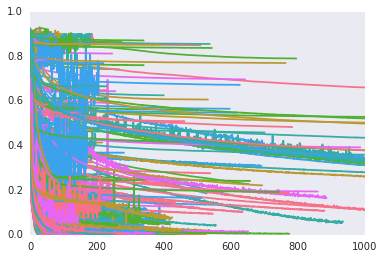

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("husl")
for i in range(len(df)):
    plt.plot(1 - np.array(df['accuracy_train'].iloc[i]))
    #plt.plot(df['error_valid'][i], label=i)
plt.legend()

In [84]:
from pprint import pprint
df_s = df.sort_values(by="accuracy_valid_max", ascending=False)
df_s.iloc[0:10]

,seed,accuracy_train_std,accuracy_valid_std,accuracy_test_std,accuracy_train,accuracy_valid,moving_var_accuracy_train,accuracy_train_last,accuracy_valid_last,accuracy_valid_max,...,loss_train,learning_ratedataset,start,epoch,seed,error_valid,code_,_id,model,duration
270,279703688,"[0.0157761140906, 0.0211705044693, 0.018368911...","[0.0230359772563, 0.0301594555297, 0.020393653...",0.009416,"[0.486627870928, 0.619455511432, 0.68689546131...","[0.480205489928, 0.627214914345, 0.68676610739...","[0.0213126016287, 0.0485037315401, 0.074049893...",0.999628,0.923072,0.927243,...,"[1.54606437683, 1.13017106056, 0.925799787045,...",NaN,2016-02-03 11:52:12.827000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",279703688,"[0.519794510072, 0.372785085655, 0.31323389260...",from datetime import datetime\nimport matplotl...,NaN,residualv3,345529.047164
558,960492231,"[0.0133228036693, 0.0163674688878, 0.014082404...","[0.0175777838329, 0.0134399594405, 0.017649242...",0.009303,"[0.282778109427, 0.492114140654, 0.44826976484...","[0.276580442865, 0.489359292639, 0.44147390342...","[0.0071967113254, 0.0258400128612, 0.035818497...",0.999977,0.923327,0.925189,...,"[1.8388903141, 1.35933566093, 1.15001964569, 1...",NaN,2016-01-29 16:05:49.094000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",960492231,"[0.723419557135, 0.510640707361, 0.55852609657...",from datetime import datetime\nimport matplotl...,NaN,residualv3,159422.187531
420,423058430,"[0.0218939495327, 0.0183454520192, 0.022683031...","[0.0101291539455, 0.0115828215827, 0.011134196...",0.008843,"[0.642998814715, 0.730223618032, 0.76546241982...","[0.632961043392, 0.708556393543, 0.73523978727...","[0.0372102728152, 0.0734001435961, 0.102301265...",0.999047,0.919838,0.922300,...,"[1.44729959965, 0.991152882576, 0.81297814846,...",NaN,2016-02-02 06:14:17.877000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",423058430,"[0.367038956608, 0.291443606457, 0.26476021272...",from datetime import datetime\nimport matplotl...,NaN,residualv3,225878.728074
377,629355188,"[0.0174568936814, 0.0188417555409, 0.018240920...","[0.0194963204049, 0.0118339114898, 0.011312141...",0.007028,"[0.558222266923, 0.690359933036, 0.73764985494...","[0.55470073654, 0.676450430629, 0.724446124341...","[0.028045088936, 0.0614780091118, 0.0897449687...",0.999930,0.919217,0.920448,...,"[1.48056173325, 1.02200186253, 0.831820249557,...",NaN,2016-02-03 11:38:08.941000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",629355188,"[0.44529926346, 0.323549569371, 0.275553875659...",from datetime import datetime\nimport matplotl...,NaN,residualv3,158337.914656
347,442221180,"[0.0155625264984, 0.0158740774282, 0.013590138...","[0.0128576533217, 0.018963949867, 0.0137152808...",0.008737,"[0.517916443164, 0.649702813538, 0.70731062834...","[0.507853680346, 0.642248682229, 0.69497423286...","[0.024141369789, 0.0539020317753, 0.0804520808...",0.997001,0.913673,0.918851,...,"[1.55037176609, 1.1181845665, 0.898368835449, ...",NaN,2016-01-24 04:27:07.494000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",442221180,"[0.492146319654, 0.357751317771, 0.30502576713...",from datetime import datetime\nimport matplotl...,NaN,residualv3,240711.584413
376,21296070,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,"[0.501811764706, 0.677364705882, 0.73581176470...","[0.489866666667, 0.6516, 0.7124, 0.74466666666...","[0.0226633542478, 0.0557993449839, 0.085141179...",0.994282,0.910800,0.917600,...,"[1.48514962196, 1.09493839741, 0.87631970644, ...",NaN,2016-02-05 09:48:13.804000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",21296070,"[0.510133333333, 0.3484, 0.2876, 0.25533333333...",from datetime import datetime\nimport matplotl...,NaN,residualv3,187587.972216
516,564939267,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,"[0.475082352941, 0.585835294118, 0.66663529411...","[0.4652, 0.5718

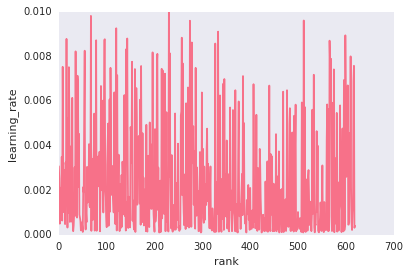

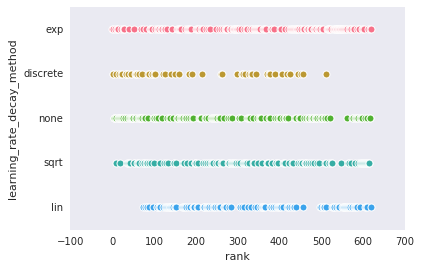

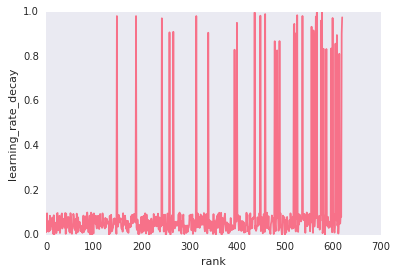

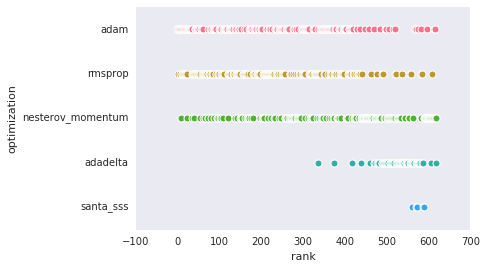

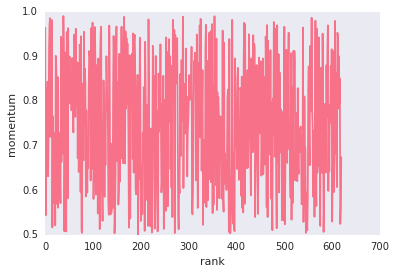

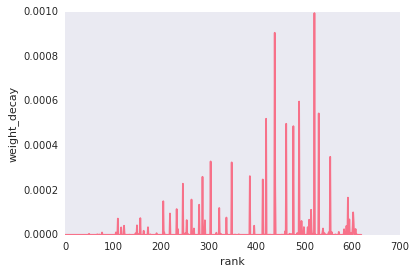

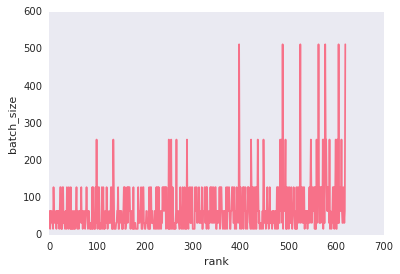

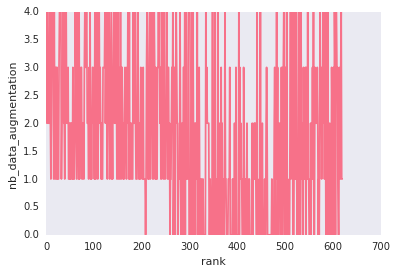

In [85]:
cols = ['learning_rate',
    'learning_rate_decay_method',    
    'learning_rate_decay',
    'optimization',
    'momentum',
    'weight_decay',
    'batch_size',
    'nb_data_augmentation']
for c in cols:
    vals = df_s['hp'].apply(lambda e:e[c])
    ranks = np.arange(len(vals))
    if type(vals[0])== unicode:
        a=pd.DataFrame({'rank': ranks, c: vals})
        sns.stripplot(x='rank', y=c, data=a)
    else:
        plt.plot(ranks, vals)
    plt.xlabel("rank")
    plt.ylabel(c)
    plt.show()

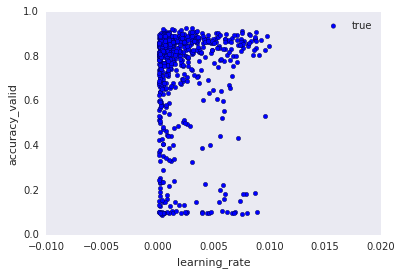

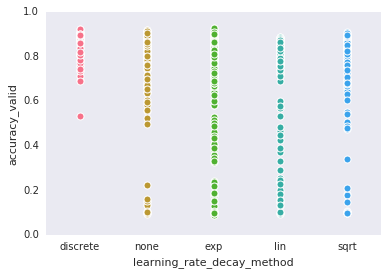

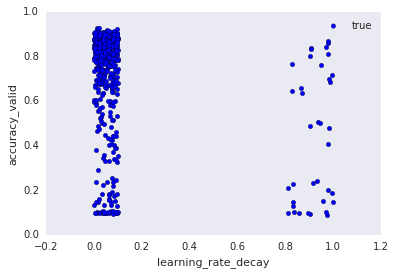

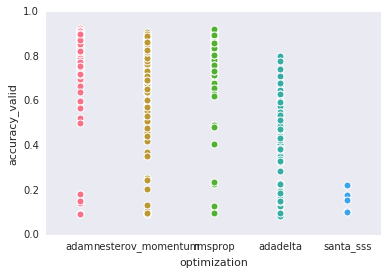

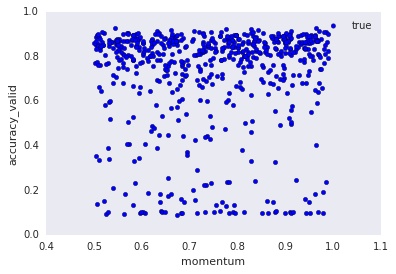

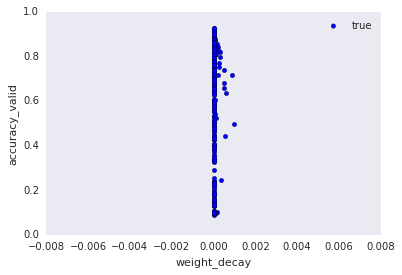

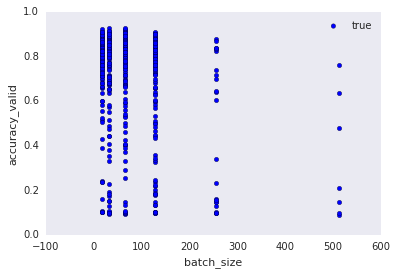

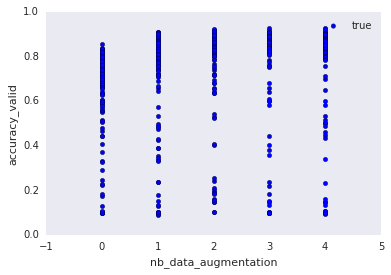

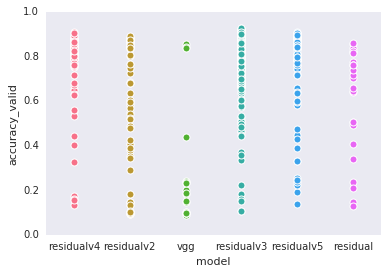

In [86]:
cols = [
    'learning_rate',
    'learning_rate_decay_method',    
    'learning_rate_decay',
    'optimization',
    'momentum',
    'weight_decay',
    'batch_size',
    'nb_data_augmentation',
    'model'
]
yname = "accuracy_valid"
for c in cols:
    xname = c
    x, y = [], []
    for e in experiments:
        hp = e["hp"]
        if c in hp:
            x.append(hp[c])
        else:
            x.append(e[c])
        y.append(np.max(e[yname]))
    if type(x[0]) == unicode:
        a=pd.DataFrame({xname: x, yname: y})
        sns.stripplot(x=xname, y=yname, data=a)
        plt.show()
    else:
        """
        import GPy
        fig = plt.figure()
        x = np.array(x)[:, None]
        y = np.array(y)[:, None]
        kern = GPy.kern.Matern32(input_dim=1 )
        gp = GPy.models.GPRegression(x, y, kern)
        gp.optimize()
        gp.plot()
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.legend()        
        plt.show()
        continue
        x_ = np.linspace(np.min(x), np.max(x), 100)
        y_, y_std_ = gp.predict(x_[:, None], return_std=True)
        plt.errorbar(x_, y_, yerr=y_std_, c='red', label="fit")

        """
        fig = plt.figure()
        plt.scatter(x, y, c='blue', label="true")
        #plt.xlim((np.min(x), np.max(x)))
        plt.legend()
        xname = c
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.show()

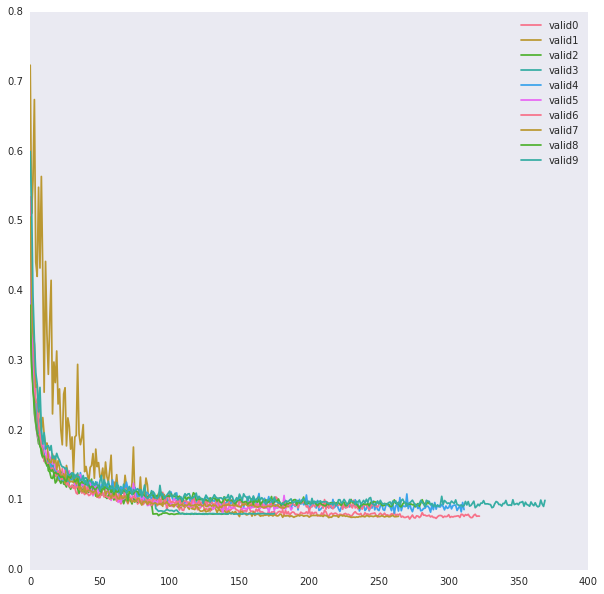

In [87]:
## best model learning curves (best according to validation)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("husl")
fig = plt.figure(figsize=(10, 10))
for best in range(0, 10):
    #plt.plot(1 - np.array(df_s['accuracy_train'].iloc[best]), label="train")
    plt.plot(df_s['error_valid'].iloc[best], label="valid{}".format(best))
    plt.legend()

In [88]:
df.sort_values(by="accuracy_valid_last", ascending=False)[["accuracy_valid_last", "accuracy_test", "model"]]

,accuracy_valid_last,accuracy_test,model
558,0.923327,0.804638,residualv3
270,0.923072,0.851806,residualv3
420,0.919838,0.908576,residualv3
377,0.919217,0.907434,residualv3
347,0.913673,0.218794,residualv3
376,0.910800,0.286300,residualv3
257,0.909471,0.884530,residualv3
229,0.909349,0.903121,residualv3
316,0.908133,0.899700,residualv3
86,0.908128,0.908978,residualv3


In [89]:
import pprint
print(df["accuracy_valid_max"].argmax())
e=experiments[df["accuracy_valid_max"].argmax()]
pprint.pprint(e["hp"])
pprint.pprint(e["hp_model"])
pprint.pprint(e["accuracy_test"])

270
{u'batch_size': 32,
 u'discrete_learning_divide': 10.0,
 u'discrete_learning_rate_epsilon': 0.0001,
 u'do_flip': True,
 u'l2_decay': 4.7331109334346396e-07,
 u'learning_rate': 0.003070729372355916,
 u'learning_rate_decay': 0.011499500064496515,
 u'learning_rate_decay_method': u'exp',
 u'max_epochs': 1000,
 u'momentum': 0.9638292993452588,
 u'nb_data_augmentation': 4,
 u'optimization': u'adam',
 u'patience_check_each': 1,
 u'patience_nb_epochs': 50,
 u'patience_threshold': 1,
 u'rotation_range': [0, 0],
 u'shear_range': [1, 1],
 u'translation_range': [-5, 5],
 u'valid_ratio': 0.15,
 u'weight_decay': 0.0,
 u'zoom_range': [1, 1]}
{u'f0': 32,
 u'f1': 16,
 u'f2': 64,
 u'f3': 64,
 u'fs0': 3,
 u'fs1': 3,
 u'fs2': 3,
 u'fs3': 3,
 u'nbg1': 5,
 u'nbg2': 5,
 u'nbg3': 5,
 u'nonlin': u'rectify',
 u'pg1': 2,
 u'pg2': 2,
 u'pg3': 2}
0.851805644132653


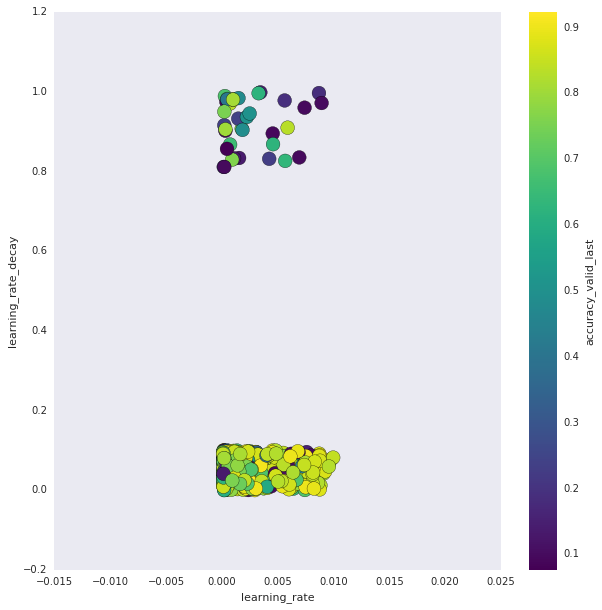

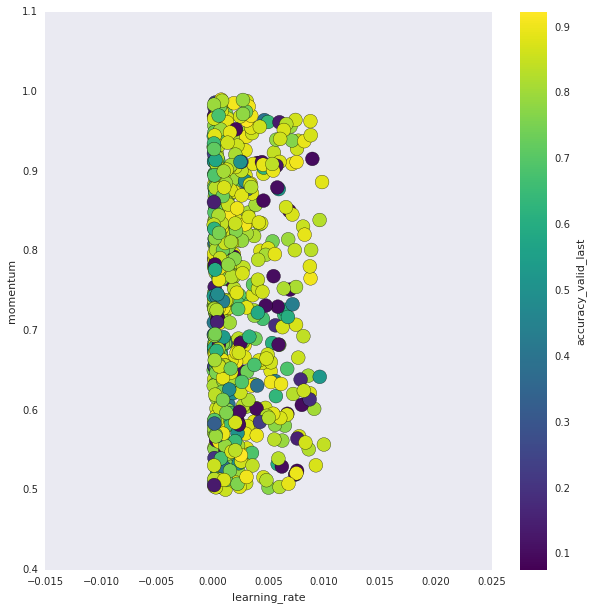

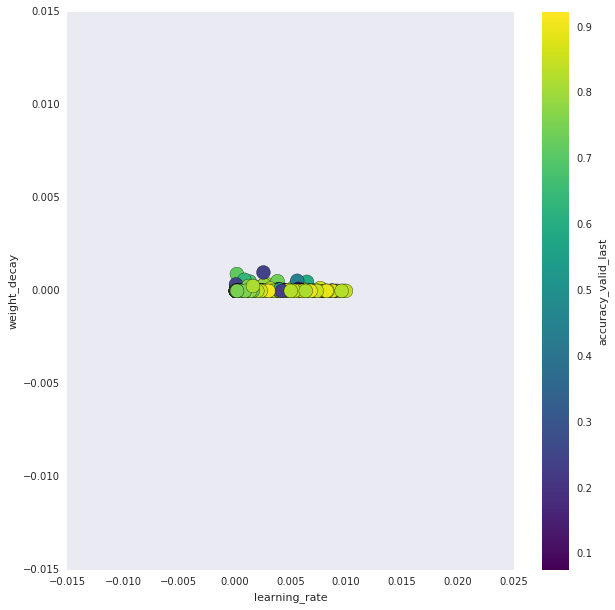

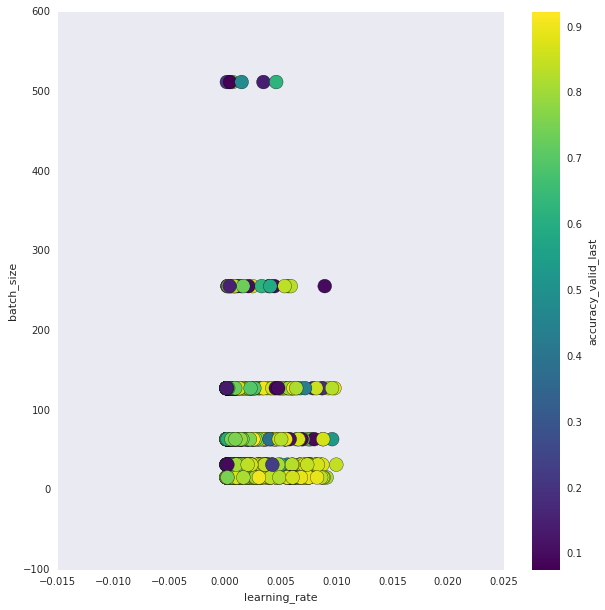

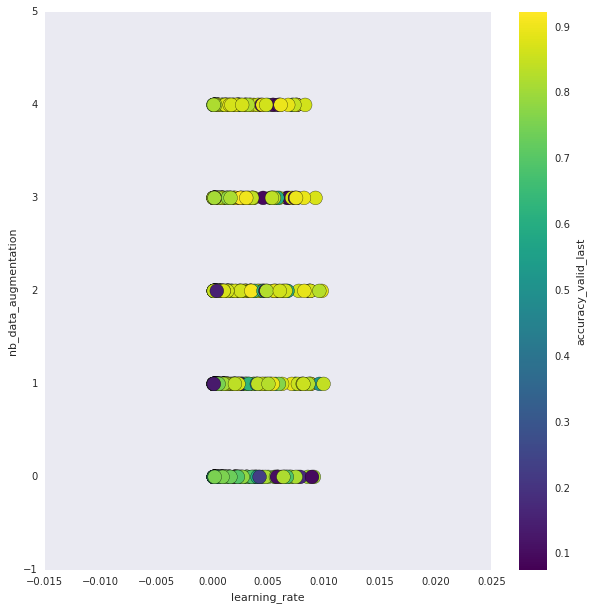

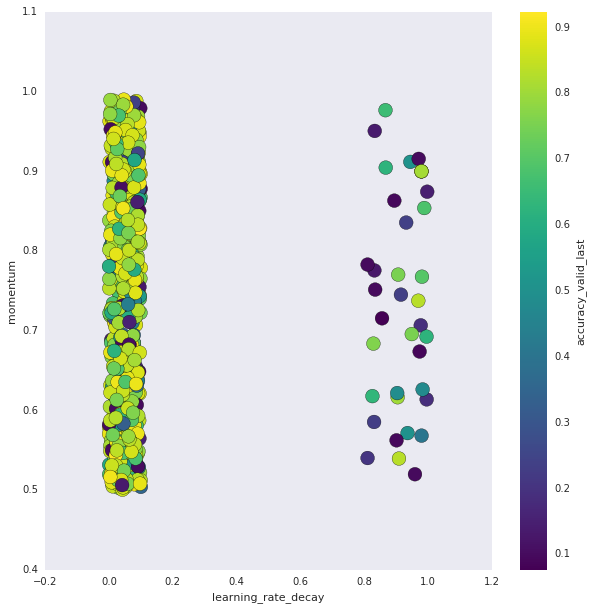

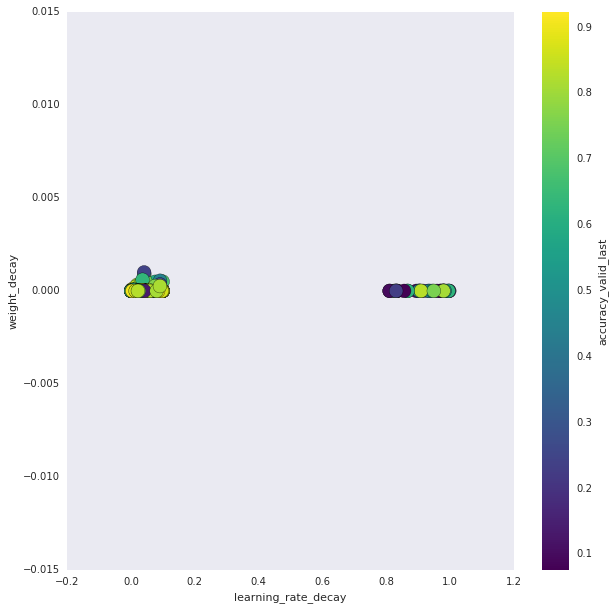

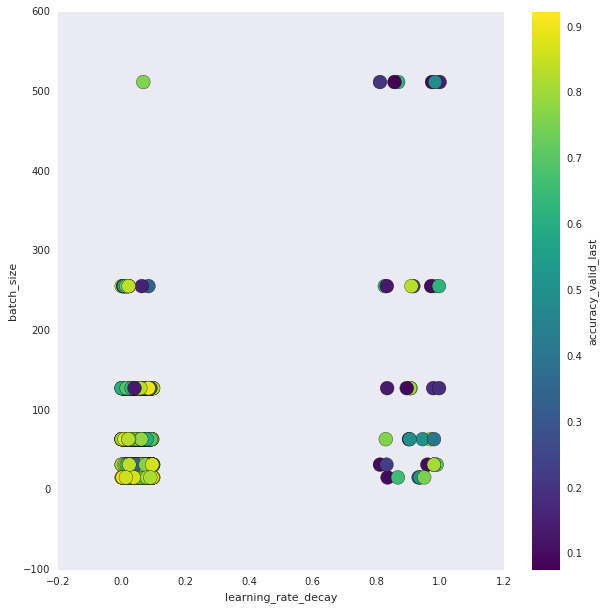

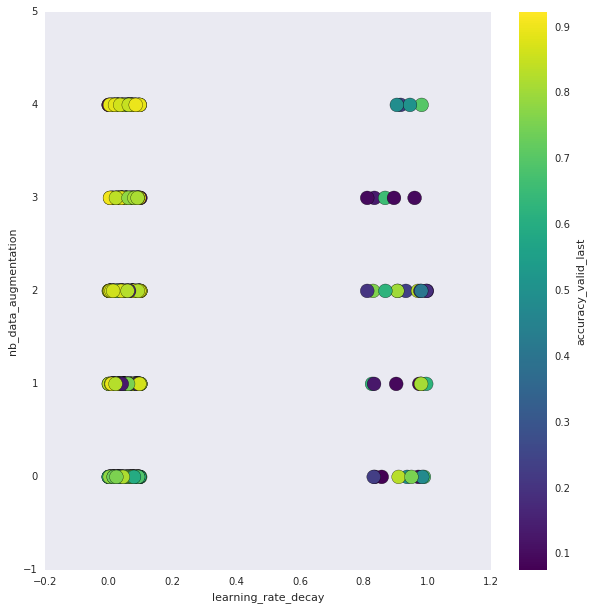

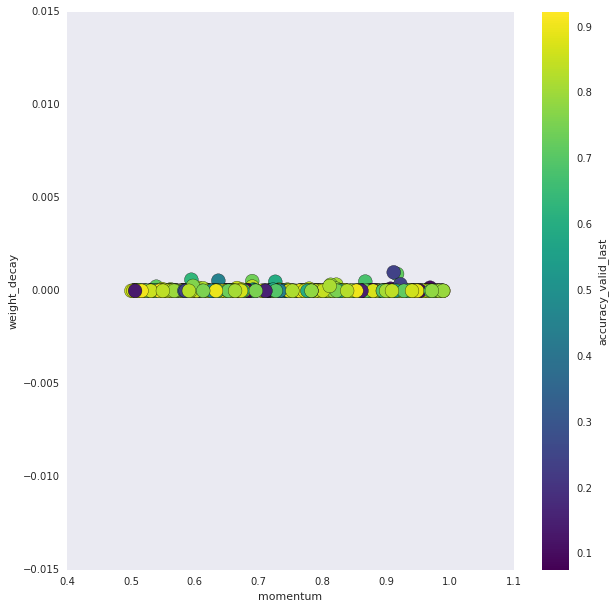

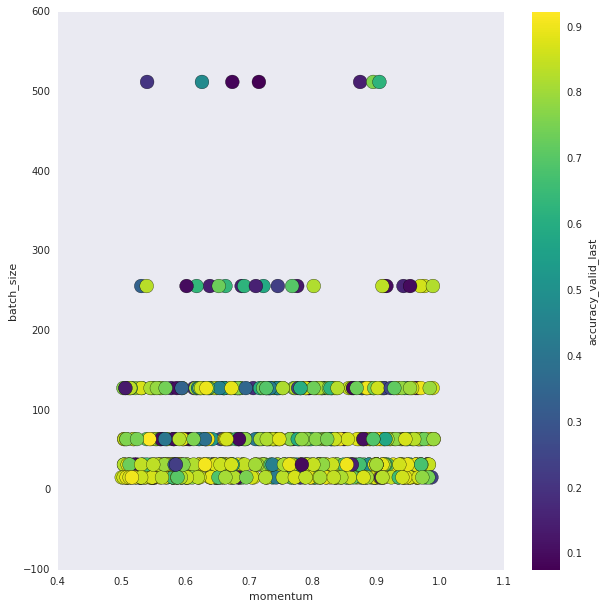

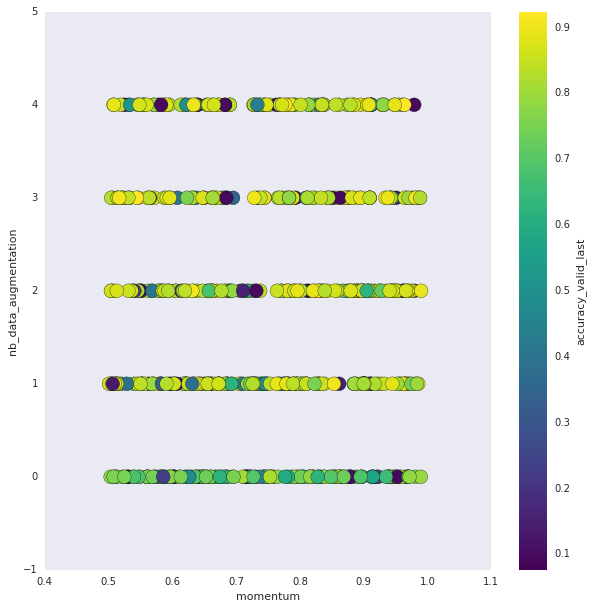

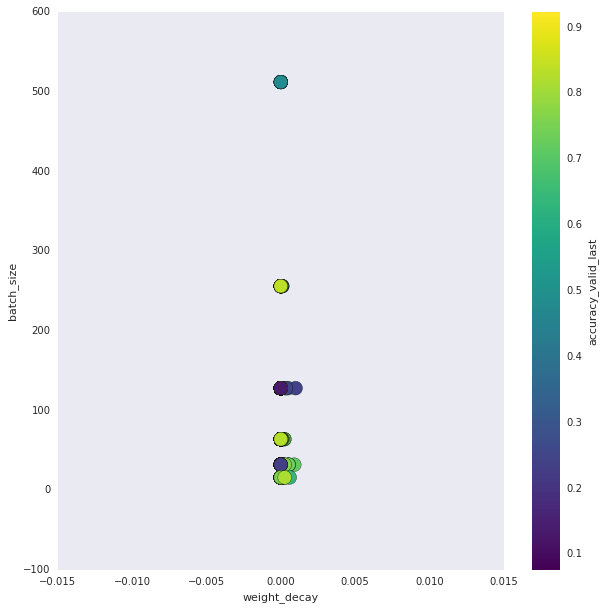

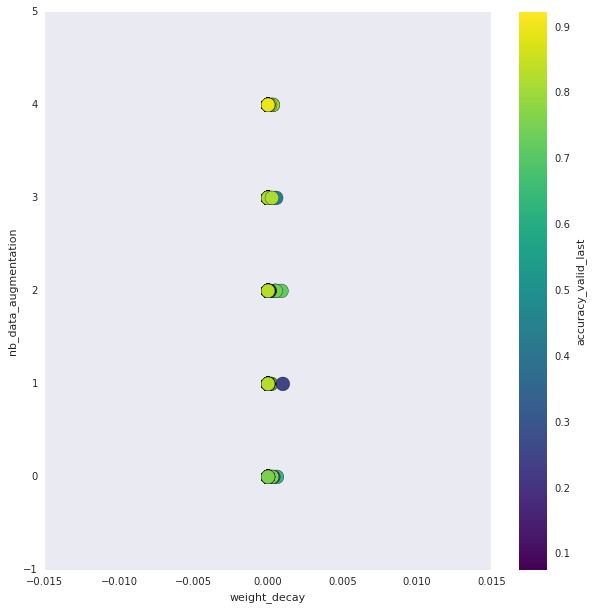

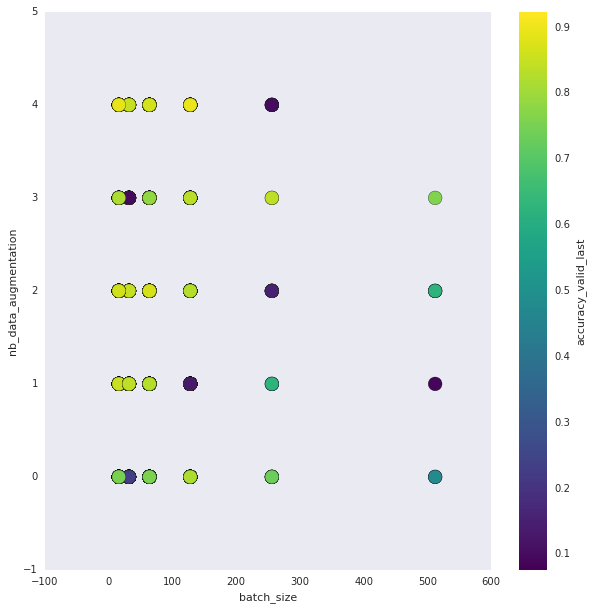

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.gaussian_process import GaussianProcess
import numpy as np
cols = [
    'learning_rate',
    #'learning_rate_decay_method',    
    'learning_rate_decay',
    #'optimization',
    'momentum',
    'weight_decay',
    'batch_size',
    'nb_data_augmentation',
    
]

wrt = 'accuracy_valid_last'

C = [c for c in cols if c != wrt]

cm = plt.cm.get_cmap('viridis')
for c1, c2 in combinations(C, 2):
    x = []
    y = []
    for e in experiments:
        x.append(e["hp"][c1])
        y.append(e["hp"][c2])
    fig = plt.figure(figsize=(10, 10))
    
    sc = plt.scatter((x), (y), c=(df[wrt]), cmap=cm, s=190)
    plt.colorbar(sc, label=wrt)
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.show()

# regression of hyper-parameters

In [91]:
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
def merge_dicts(*d):
    z = d[0].copy()
    for a in d[1:]:
        z.update(a)
    return z

X_list = [ 
    merge_dicts(e['hp'], e['hp_model'], 
                {'model': e['model']},
                {"accuracy_train_first": e["accuracy_train"][0]}) 
    for e in experiments
]    
X = pd.DataFrame(X_list)
print(X.columns)
yname = "accuracy_valid_last"
#yname = "duration"
y = [e[yname] for e in experiments]
y = np.array(y)
retain = [
    'batch_size', 
    'learning_rate', 
    'learning_rate_decay', 
    'learning_rate_decay_method', 
    'momentum',
    'nb_data_augmentation', 
    'optimization', 
    'weight_decay',
  #  'hp_model',
    'model',
    
#    u'f0', u'f1', u'f2', u'f3', u'fs0', u'fs1',
#    u'fs2', u'fs3', u'nbg1', u'nbg2', u'nbg3', u'nonlin',
#    u'pg1', u'pg2', u'pg3',
#    u'accuracy_train_first'
]
          
X = X[retain].T.to_dict().values()
vectorizer = DV( sparse = False )
vectorizer.fit(X)
X_v = vectorizer.transform(X)
names = vectorizer.feature_names_

Index([          u'accuracy_train_first',                     u'batch_size',
             u'discrete_learning_divide', u'discrete_learning_rate_epsilon',
                                  u'do1',                            u'do2',
                                  u'do3',                            u'do4',
                                  u'do5',                        u'do_flip',
                                  u'ds1',                            u'ds2',
                                   u'f0',                             u'f1',
                                   u'f2',                             u'f3',
                                  u'fs0',                            u'fs1',
                                  u'fs2',                            u'fs3',
                             u'l2_decay',                  u'learning_rate',
                  u'learning_rate_decay',     u'learning_rate_decay_method',
                           u'max_epochs',                          u'model',

In [92]:

from hp_toolkit.search import RandomSearch, DensityFitSearch
from hp_toolkit.hp import Param
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
def epsilon():
    t = 1
    while True:
        eps = 1. / t
        yield eps
        t += 1

hp = {
    "max_depth": Param(initial=1, interval=[1, 20], type='int'),
    "n_estimators": Param(initial=10, interval=[10, 300], type='int')
}

search = DensityFitSearch(hp, epsilon=epsilon, keep=10)
#search = RandomSearch(hp)

best_score = -np.inf

for i in range(10):
    
    params = search.sample_next()
    reg = RandomForestRegressor(n_jobs=1, **params)
    s = (-cross_val_score(reg, X_v, y, scoring='mean_absolute_error', cv=5, n_jobs=2))
    #score = norm.logpdf(s.mean(), loc=1, scale=s.std())
    score = -s.mean()
    search.update(params, -score)
    if score > best_score:
        print(best_score, score)
        best_params = params
        best_score = score
        print("best params : {}, mean error :{}".format(params, s.mean()))
        reg.fit(X_v, y)
        best_model = reg

(-inf, -0.078733474780437948)
best params : {'n_estimators': 99, 'max_depth': 6}, mean error :0.0787334747804
(-0.078733474780437948, -0.068334800576592775)
best params : {'n_estimators': 147, 'max_depth': 16}, mean error :0.0683348005766
(-0.068334800576592775, -0.067453835087155439)
best params : {'n_estimators': 151, 'max_depth': 19}, mean error :0.0674538350872


[u'batch_size', u'learning_rate', u'learning_rate_decay', u'learning_rate_decay_method=discrete', u'learning_rate_decay_method=exp', u'learning_rate_decay_method=lin', u'learning_rate_decay_method=none', u'learning_rate_decay_method=sqrt', u'model=residual', u'model=residualv2', u'model=residualv3', u'model=residualv4', u'model=residualv5', u'model=vgg', u'momentum', u'nb_data_augmentation', u'optimization=adadelta', u'optimization=adam', u'optimization=nesterov_momentum', u'optimization=rmsprop', u'optimization=santa_sss', u'weight_decay']


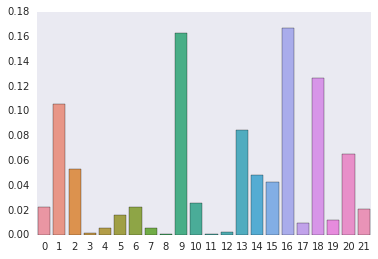

(0, 0.022532885057725858, u'batch_size')
(1, 0.10519766487920605, u'learning_rate')
(2, 0.053033067867212846, u'learning_rate_decay')
(3, 0.0012615613745747705, u'learning_rate_decay_method=discrete')
(4, 0.0054057093438018063, u'learning_rate_decay_method=exp')
(5, 0.015990501478639434, u'learning_rate_decay_method=lin')
(6, 0.022501747359080278, u'learning_rate_decay_method=none')
(7, 0.005295275321725532, u'learning_rate_decay_method=sqrt')
(8, 0.00095288651376338298, u'model=residual')
(9, 0.16254558314029152, u'model=residualv2')
(10, 0.02558216914328219, u'model=residualv3')
(11, 0.0010112883696697956, u'model=residualv4')
(12, 0.0020527544477017619, u'model=residualv5')
(13, 0.084496782409726578, u'model=vgg')
(14, 0.048433900567318257, u'momentum')
(15, 0.042983528242016393, u'nb_data_augmentation')
(16, 0.16683040868773305, u'optimization=adadelta')
(17, 0.0095223996418348153, u'optimization=adam')
(18, 0.12644234104381599, u'optimization=nesterov_momentum')
(19, 0.01173180332

In [109]:
print(names)
sns.barplot(np.arange(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.show()

#feats, imps = zip(*sorted(zip(best_model.feature_importances_, names), reverse=True))
feats, imps = zip(*(zip(best_model.feature_importances_, names)))
for idx, feat, imp in zip(range(len(feats)), feats, imps):
    print(idx, feat, imp)

In [112]:
# as time goes
plt.plot(df['accuracy_valid_max'].cummax())

KeyError: 'accuracy_valid_max'

In [113]:
y_pred = best_model.predict(X_v)
df_pred = pd.DataFrame({'pred': y_pred, 'real': y, 'diff': np.abs(y - y_pred)})
df_pred = df_pred.sort_values(by='diff', ascending=False)
df_pred

,diff,pred,real
181,0.291681,0.392435,0.100754
410,0.245445,0.342935,0.097489
508,0.237321,0.335211,0.097890
488,0.231831,0.601682,0.833513
147,0.219441,0.612423,0.831864
339,0.199299,0.629093,0.828392
2,0.179181,0.674719,0.853900
54,0.164096,0.267902,0.103805
161,0.163665,0.302000,0.138335
442,0.155916,0.399102,0.243186
